# Data Analyst au sein de la FAO

lien du brief : https://simplonline.co/briefs/688fc302-e4d4-4324-8904-f22316c31713



lien du dossier git : https://github.com/data-IA-2023/Groupe-3


Vous venez d'intégrer la FAO (Food and Agriculture Organization of the United Nations). BRAVO !!!!!!
Vous allez mener votre première mission en analysant les données mondiales de production agricole, d'alimentation et de nutrition.

**Livrables**

* Un dépôt Github
* Un notebook **fonctionnel, documenté et commenté**
* Une présentation écrite et orale résumant vos travaux, votre analyse et vos recommandations

**Contexte du projet**

* Au sein du service Data Analytics and Prospective de la FAO, vous êtes en charge d'analyser les données produites par les Nations Unies.

* Ces analyses conduisent à des rapports de synthèse à destination des décideurs.

* Pour êtes également en charge de la partie Prospective, c'est à dire donner des tendances et des évolutions probables quant à la production agricole, à l'alimentation et la nutrition mondiales.


**Ressource(s)**

FAO - Wikipedia : https://fr.wikipedia.org/wiki/Organisation_des_Nations_unies_pour_l'alimentation_et_l'agriculture

FAOSTAT : https://www.fao.org/faostat/fr/#home

Les données FAO 2013 : https://github.com/remijul/dataset/tree/master/fao_2013

## Partie traitement des données

In [606]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Chargement des données avec définition de l'index et changement des types des  dimensions
url_bd="https://github.com/remijul/dataset/raw/4156ed0c38c1f5e81b3bf8e6458a245c5fa6c35a/"
url_bd=""

chemein_BD_vegetal = url_bd+"fao_2013/FAOSTAT_2013_vegetal.csv"
FAOSTAT_2013_vegetal = pd.read_csv(chemein_BD_vegetal, sep=',',on_bad_lines='skip',dtype={'Code Pays': str,'Code Élément': str,'Code Produit':str, 'Année':str, 'Code Année':str})

chemein_BD = url_bd+"fao_2013/FAOSTAT_2013_animal.csv"
FAOSTAT_2013_animal = pd.read_csv(chemein_BD, sep=',',on_bad_lines='skip',dtype={'Code Pays': str,'Code Élément': str,'Code Produit':str, 'Code année':str, 'Année':str})

chemein_BD = url_bd+"fao_2013/FAOSTAT_2013_cereal.csv"
FAOSTAT_2013_cereal = pd.read_csv(chemein_BD, sep=',',on_bad_lines='skip',dtype={'Code Pays': str,'Code Élément': str,'Code Produit': str,'Code Année': str,'Année': str})

chemein_BD = url_bd+"fao_2013/FAOSTAT_2013_population.csv"
FAOSTAT_2013_population = pd.read_csv(chemein_BD, sep=',',on_bad_lines='skip',dtype={'Country Code': str,'Element Code': str,'Item Code': str,'Year Code': str,'Year': str})

chemein_BD = url_bd+"fao_2013/FAOSTAT_2013_sous_alimentation.csv"
FAOSTAT_2013_sous_alimentation = pd.read_csv(chemein_BD, sep=',',on_bad_lines='skip',dtype={'Code zone': str,'Code Élément': str,'Code Produit': str,'Code année': str,'Année': str})



In [607]:
color_list_bar = ['#039be5', '#ffeb38', '#8bc34a']
#color_discrete_sequence=color_list_bar => dans fig = px.bar( ... )
color_list_pie = ['#ffeb38', '#039be5', '#8bc34a']
#colors=color_list_pie => ax1.pie( ... )

### 1 - Etude guidée n°1

Il s’agit ici de répondre à toutes les questions ci-dessous.

#### Question 1 : Nombre d'humains sur la planète
Calculez le nombre total d’humains sur la planète.
Critiquez votre résultat. En cas d’anomalie, analysez et effectuer les corrections nécessaires.
Donnez le résultat de votre calcul pour l'année 2013.

In [608]:

Totalpopulation=FAOSTAT_2013_population['Value'].sum()*1000
print(f"Le nombre d'humains sur la planète est: {Totalpopulation}")

Le nombre d'humains sur la planète est: 8413993000


In [609]:
FAOSTAT_2013_population.drop(FAOSTAT_2013_population[FAOSTAT_2013_population['Flag']=='A'].index, inplace=True)
Totalpopulation=FAOSTAT_2013_population['Value'].sum()*1000
print(f"Le nombre d'humains sur la planète est: {Totalpopulation}")

Le nombre d'humains sur la planète est: 6997326000


In [610]:
FAOSTAT_2013_population.sort_values(by='Value', ascending=False, inplace=True )
fig = px.bar(x=FAOSTAT_2013_population.head(20).Country, y=FAOSTAT_2013_population.head(20).Value, height=1000)
fig.show()


In [611]:
#Supprimer les agrégats

FAOSTAT_2013_animal.drop(FAOSTAT_2013_animal[FAOSTAT_2013_animal['Symbole']=='A'].index, inplace=True)
FAOSTAT_2013_cereal.drop(FAOSTAT_2013_cereal[FAOSTAT_2013_cereal['Symbole']=='A'].index, inplace=True)
FAOSTAT_2013_population.drop(FAOSTAT_2013_population[FAOSTAT_2013_population['Flag']=='A'].index, inplace=True)
FAOSTAT_2013_vegetal.drop(FAOSTAT_2013_vegetal[FAOSTAT_2013_vegetal['Symbole']=='A'].index, inplace=True)

#Pour sous population il n'y a pas de symbole alors en utilise Zone
FAOSTAT_2013_sous_alimentation.drop(FAOSTAT_2013_sous_alimentation[FAOSTAT_2013_sous_alimentation['Zone']=='Chine'].index, inplace=True)

#### Question 2 : Redondances
Identifiez ces redondances, en donnant votre réponse sous forme de formule mathématique (pas besoin de coder ici).
C'est une équation à 3 termes de type (a_1 + a2 + [...] = b_1 + b_2 + [...] = c_1 + c_2 + [...]) ) faisant intervenir chacune des 11 quantités données ci dessus.
Illustrez cette équation avec l'exemple du blé en France.

-Pour Les Data Animal, Cereal, Vegetal :

    Production + 'Importations - Quantité' + Variation de stock = 'Aliments pour animaux' + 'Autres Utilisations' + Nourriture + Pertes + Semences + Traitement + 'Exportations - Quantité'

    'Aliments pour animaux' + 'Autres Utilisations' + Nourriture + Pertes + Semences + Traitement = 'Disponibilité intérieure'

    'Disponibilité intérieure' + 'Exportations - Quantité' = Production + 'Importations - Quantité' + Variation de stock
    Production + Importations - Exportations + Variation de stock= Disponibilité intérieure

In [612]:
df_france=FAOSTAT_2013_cereal[FAOSTAT_2013_cereal['Pays']=='France']
df_france=df_france[df_france['Symbole']=='S']
df_france=df_france[df_france['Produit']=='Blé']


Production=df_france[df_france['Élément']=='Production']['Valeur'].sum()
Importations=df_france[df_france['Élément']=='Importations - Quantité']['Valeur'].sum()
Variation=df_france[df_france['Élément']=='Variation de stock']['Valeur'].sum()


Aliments_animaux=df_france[df_france['Élément']=='Aliments pour animaux']['Valeur'].sum()
Autres_Utilisations=df_france[df_france['Élément']=='Autres Utilisations']['Valeur'].sum()
Nourriture=df_france[df_france['Élément']=='Nourriture']['Valeur'].sum()
Pertes=df_france[df_france['Élément']=='Pertes']['Valeur'].sum()
Semences=df_france[df_france['Élément']=='Semences']['Valeur'].sum()
Traitement=df_france[df_france['Élément']=='Traitement']['Valeur'].sum()
Exportations=df_france[df_france['Élément']=='Exportations - Quantité']['Valeur'].sum()
Disponibilité=df_france[df_france['Élément']=='Disponibilité intérieure']['Valeur'].sum()

print(f"la somme de Production + Importations - Quantité' + Variation de stock est {Production+Importations+Variation}")
print(f"la somme de 'Aliments pour animaux' + 'Autres Utilisations' + Nourriture + Pertes + Semences + Traitement + 'Exportations - Quantité' est {Aliments_animaux+Autres_Utilisations+Nourriture+Pertes+Semences+Traitement+Exportations}")

print(f"Production + Importations - Exportations + Variation de stock= {Production+Importations-Exportations+Variation }")
print(f"Disponibilité = {Disponibilité}")

la somme de Production + Importations - Quantité' + Variation de stock est 41800.0
la somme de 'Aliments pour animaux' + 'Autres Utilisations' + Nourriture + Pertes + Semences + Traitement + 'Exportations - Quantité' est 41800.0
Production + Importations - Exportations + Variation de stock= 20298.0
Disponibilité = 20298.0


#### Question 3 : Disponibilité alimentaire (calories, protéines)
Calculez (pour chaque pays et chaque produit) la disponibilité alimentaire en kcal puis en kg de protéines. Vous ferez cela à partir de ces informations :
- Population de chaque pays
- Disponibilité alimentaire donnée pour chaque produit et pour chaque pays en kcal/personne/jour, -
- Disponibilité alimentaire en protéines donnée pour chaque produit et pour chaque pays en g/personne/jour.
Pour cette étape vous avez besoin de constituer une seule et même table à partir des tables animaux et végétaux.

In [613]:
#Population de chaque pays
dPopulation=FAOSTAT_2013_population
dPopulation=dPopulation[['Country Code', 'Country', 'Value']]
dPopulation.loc[:,'Value']=FAOSTAT_2013_population['Value']*1000 

dPopulation

dPopulation.sort_values(by='Value', ascending=False, inplace=True )
fig = px.bar(x=dPopulation.head(10).Country,color_discrete_sequence=color_list_bar,y=dPopulation.head(10).Value,height=1000)
fig.show()

C:\Users\MOHAM\AppData\Local\Temp\ipykernel_12664\1840451088.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [614]:
df = pd.concat([FAOSTAT_2013_vegetal, FAOSTAT_2013_animal])
df = df[['Code Pays', 'Pays', 'Élément', 'Code Produit', 'Produit', 'Valeur']]
df = df[df['Élément']=='Disponibilité alimentaire (Kcal/personne/jour)']

merged_df = df.merge(dPopulation, left_on='Code Pays', right_on='Country Code')
merged_df= merged_df[['Code Pays', 'Pays', 'Value','Élément', 'Code Produit', 'Produit', 'Valeur']]
merged_df.rename(columns={'Value': 'Population'}, inplace=True)

merged_df = merged_df.assign(Kcal=merged_df['Valeur']*merged_df['Population']*365)

m_df_kcal=merged_df
m_df_kcal


,Code Pays,Pays,Population,Élément,Code Produit,Produit,Valeur,Kcal
0,2,Afghanistan,30552000,Disponibilité alimentaire (Kcal/personne/jour),2511,Blé,1369.0,1.526638e+13
1,2,Afghanistan,30552000,Disponibilité alimentaire (Kcal/personne/jour),2805,Riz (Eq Blanchi),141.0,1.572359e+12
2,2,Afghanistan,30552000,Disponibilité alimentaire (Kcal/personne/jour),2513,Orge,26.0,2.899385e+11
3,2,Afghanistan,30552000,Disponibilité alimentaire (Kcal/personne/jour),2514,Maïs,21.0,2.341811e+11
4,2,Afghanistan,30552000,Disponibilité alimentaire (Kcal/personne/jour),2517,Millet,3.0,3.345444e+10
...,...,...,...,...,...,...,...,...
14236,181,Zimbabwe,14150000,Disponibilité alimentaire (Kcal/personne/jour),2764,"Poissons Marins, Autres",0.0,0.000000e+00
14237,181,Zimbabwe,14150000,Disponibilité alimentaire (Kcal/personne/jour),2765,Crustacés,0.0,0.000000e+00
14238,181,Zimbabwe,14150000,Disponibilité alimentaire (Kcal/personne/jour),2766,Cephalopodes,0.0,0.000000e+00
14239,181,Zimbabwe,14150000,Disponibilité alimentaire (Kcal/personne/jour),2767,"Mollusques, Autres",0.0,0.000000e+00


In [615]:




#m_df_kcal=merged_df[['Code Pays', "Pays", 'Population', 'Code Produit', 'Produit', "Kcal"]]

df=m_df_kcal[m_df_kcal['Produit']=='Blé']

df.sort_values(by='Kcal', ascending=False, inplace=True )
df.head(10)
fig = px.bar(x=df.head(10).Pays,y=df.head(10).Kcal, height=1000,color_discrete_sequence=color_list_bar)
fig.show()

#m_df_kcal[m_df_kcal['Code Produit']=='2511']
#m_df_kcal_group=m_df_kcal.groupby(["Code Pays", "Pays", 'Produit']).sum()
#m_df_kcal_group

C:\Users\MOHAM\AppData\Local\Temp\ipykernel_12664\70058195.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [616]:
m_df_kcal

,Code Pays,Pays,Population,Élément,Code Produit,Produit,Valeur,Kcal
0,2,Afghanistan,30552000,Disponibilité alimentaire (Kcal/personne/jour),2511,Blé,1369.0,1.526638e+13
1,2,Afghanistan,30552000,Disponibilité alimentaire (Kcal/personne/jour),2805,Riz (Eq Blanchi),141.0,1.572359e+12
2,2,Afghanistan,30552000,Disponibilité alimentaire (Kcal/personne/jour),2513,Orge,26.0,2.899385e+11
3,2,Afghanistan,30552000,Disponibilité alimentaire (Kcal/personne/jour),2514,Maïs,21.0,2.341811e+11
4,2,Afghanistan,30552000,Disponibilité alimentaire (Kcal/personne/jour),2517,Millet,3.0,3.345444e+10
...,...,...,...,...,...,...,...,...
14236,181,Zimbabwe,14150000,Disponibilité alimentaire (Kcal/personne/jour),2764,"Poissons Marins, Autres",0.0,0.000000e+00
14237,181,Zimbabwe,14150000,Disponibilité alimentaire (Kcal/personne/jour),2765,Crustacés,0.0,0.000000e+00
14238,181,Zimbabwe,14150000,Disponibilité alimentaire (Kcal/personne/jour),2766,Cephalopodes,0.0,0.000000e+00
14239,181,Zimbabwe,14150000,Disponibilité alimentaire (Kcal/personne/jour),2767,"Mollusques, Autres",0.0,0.000000e+00


In [617]:
df_kcal=merged_df[['Code Pays', "Pays", 'Population', 'Code Produit', 'Produit', "Kcal"]]
df_kcal=df_kcal[df_kcal['Pays']=='France']

df_kcal.sort_values(by='Kcal', ascending=False, inplace=True )
df_kcal.head(10)
fig = px.bar(x=df_kcal.head(10).Produit,y=df_kcal.head(10).Kcal, height=1000, color_discrete_sequence=color_list_bar)
fig.show()


In [618]:
df = pd.concat([FAOSTAT_2013_vegetal, FAOSTAT_2013_animal])
df = df[['Code Pays', 'Pays', 'Élément', 'Code Produit', 'Produit', 'Valeur']]
df = df[df['Élément']=='Disponibilité de protéines en quantité (g/personne/jour)']

merged_df = df.merge(dPopulation, left_on='Code Pays', right_on='Country Code')
merged_df= merged_df[['Code Pays', 'Pays', 'Value','Élément', 'Code Produit', 'Produit', 'Valeur']]
merged_df.rename(columns={'Value': 'Population'}, inplace=True)

merged_df = merged_df.assign(protéinesKg=(merged_df['Valeur']/1000)*merged_df['Population']*365)
merged_df = merged_df.assign(protéinesg=(merged_df['Valeur'])*merged_df['Population']*365)
merged_df

m_df_protéinesKg=merged_df[['Code Pays', "Pays", 'Code Produit', 'Produit', "protéinesKg", "protéinesg"]]

m_df_protéinesKg


#m_df_Kg_group=m_df_Kg.groupby(["Code Pays", "Pays", 'Produit']).sum()

#m_df_Kg_group

,Code Pays,Pays,Code Produit,Produit,protéinesKg,protéinesg
0,2,Afghanistan,2511,Blé,411601126.8,4.116011e+11
1,2,Afghanistan,2805,Riz (Eq Blanchi),30108996.0,3.010900e+10
2,2,Afghanistan,2513,Orge,8809669.2,8.809669e+09
3,2,Afghanistan,2514,Maïs,6244828.8,6.244829e+09
4,2,Afghanistan,2517,Millet,892118.4,8.921184e+08
...,...,...,...,...,...,...
11556,181,Zimbabwe,2764,"Poissons Marins, Autres",154942.5,1.549425e+08
11557,181,Zimbabwe,2765,Crustacés,0.0,0.000000e+00
11558,181,Zimbabwe,2766,Cephalopodes,0.0,0.000000e+00
11559,181,Zimbabwe,2767,"Mollusques, Autres",0.0,0.000000e+00


In [619]:
df=m_df_protéinesKg
df=df[df['Produit']=='Blé']

df.sort_values(by='protéinesg', ascending=False, inplace=True )
df_kcal.head(10)
fig = px.bar(x=df.head(10).Pays,y=df.head(10).protéinesg, height=1000, color_discrete_sequence=color_list_bar)
fig.show()

C:\Users\MOHAM\AppData\Local\Temp\ipykernel_12664\2336516093.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [620]:
df=m_df_protéinesKg
df=df[df['Pays']=='France']

df.sort_values(by='protéinesg', ascending=False, inplace=True )
df_kcal.head(10)
fig = px.bar(x=df.head(10).Produit,y=df.head(10).protéinesg, height=1000, color_discrete_sequence=color_list_bar)
fig.show()




C:\Users\MOHAM\AppData\Local\Temp\ipykernel_12664\305891807.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [621]:
df = pd.concat([FAOSTAT_2013_vegetal, FAOSTAT_2013_animal])
df = df[['Code Pays', 'Pays', 'Élément', 'Code Produit', 'Produit', 'Valeur']]
df = df[df['Élément']=='Disponibilité alimentaire en quantité (kg/personne/an)']

merged_df = df.merge(dPopulation, left_on='Code Pays', right_on='Country Code')
merged_df= merged_df[['Code Pays', 'Pays', 'Value','Élément', 'Code Produit', 'Produit', 'Valeur']]
merged_df.rename(columns={'Value': 'Population'}, inplace=True)

merged_df = merged_df.assign(Kg=merged_df['Valeur']*merged_df['Population'])
merged_df

m_df_Kg=merged_df[['Code Pays', "Pays", 'Élément', 'Code Produit', 'Produit', "Kg"]]
m_df_Kg


#m_df_Kg_group=m_df_Kg.groupby(["Code Pays", "Pays", 'Produit']).sum()

#m_df_Kg_group

,Code Pays,Pays,Élément,Code Produit,Produit,Kg
0,2,Afghanistan,Disponibilité alimentaire en quantité (kg/pers...,2511,Blé,4.895347e+09
1,2,Afghanistan,Disponibilité alimentaire en quantité (kg/pers...,2805,Riz (Eq Blanchi),4.222286e+08
2,2,Afghanistan,Disponibilité alimentaire en quantité (kg/pers...,2513,Orge,8.921184e+07
3,2,Afghanistan,Disponibilité alimentaire en quantité (kg/pers...,2514,Maïs,7.638000e+07
4,2,Afghanistan,Disponibilité alimentaire en quantité (kg/pers...,2517,Millet,1.222080e+07
...,...,...,...,...,...,...
14010,181,Zimbabwe,Disponibilité alimentaire en quantité (kg/pers...,2764,"Poissons Marins, Autres",1.698000e+06
14011,181,Zimbabwe,Disponibilité alimentaire en quantité (kg/pers...,2765,Crustacés,0.000000e+00
14012,181,Zimbabwe,Disponibilité alimentaire en quantité (kg/pers...,2766,Cephalopodes,0.000000e+00
14013,181,Zimbabwe,Disponibilité alimentaire en quantité (kg/pers...,2767,"Mollusques, Autres",1.415000e+05


#### Question 4 : Ratio énergie/poids
A partir de ces dernières informations, et à partir du poids de la disponibilité alimentaire (pour chaque pays et chaque produit), calculez pour chaque produit le ratio "énergie/poids", que vous donnerez en kcal/kg. Vous pouvez vérifier la cohérence de votre calcul en comparant ce ratio aux données disponibles sur internet, par exemple en cherchant la valeur calorique d'un oeuf.

In [622]:
df_cal_g = m_df_kcal.merge(m_df_Kg, on=['Code Pays', 'Code Produit'])

df_cal_g=df_cal_g[(df_cal_g['Kcal']!=0)&(df_cal_g['Kg']!=0)] #supprimer les lignes avec valeurs = 0

df_cal_g= df_cal_g.assign(cal_g=df_cal_g['Kcal']/(df_cal_g['Kg']))
df_cal_g=df_cal_g[['Code Pays', 'Pays_x', 'Code Produit', 'Produit_x','Kcal', 'Kg','cal_g']]
df_cal_g.rename(columns={'Pays_x': 'Pays', 'Produit_x': 'Produit'}, inplace=True)

meancalg=df_cal_g[(df_cal_g['Produit']=='Oeufs')].cal_g.mean()
print(meancalg)



1364.8177721733787


In [623]:
df_cal_g

,Code Pays,Pays,Code Produit,Produit,Kcal,Kg,cal_g
0,2,Afghanistan,2511,Blé,1.526638e+13,4.895347e+09,3118.548337
1,2,Afghanistan,2805,Riz (Eq Blanchi),1.572359e+12,4.222286e+08,3723.950796
2,2,Afghanistan,2513,Orge,2.899385e+11,8.921184e+07,3250.000000
3,2,Afghanistan,2514,Maïs,2.341811e+11,7.638000e+07,3066.000000
4,2,Afghanistan,2517,Millet,3.345444e+10,1.222080e+07,2737.500000
...,...,...,...,...,...,...,...
13983,181,Zimbabwe,2737,Graisses Animales Crue,1.291188e+11,1.683850e+07,7668.067227
13986,181,Zimbabwe,2744,Oeufs,3.098850e+10,2.476250e+07,1251.428571
13987,181,Zimbabwe,2848,Lait - Excl Beurre,2.530728e+11,4.513850e+08,560.658307
13988,181,Zimbabwe,2761,Poissons Eau Douce,2.065900e+10,2.900750e+07,712.195122


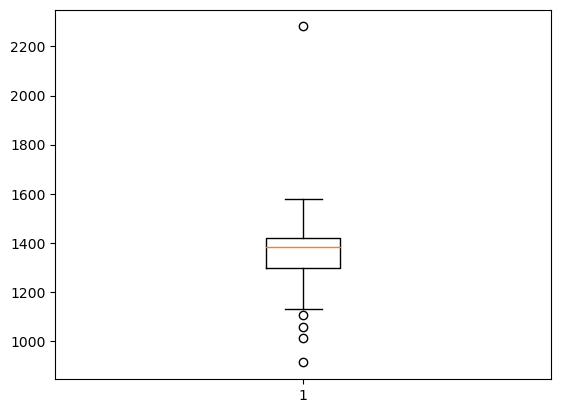

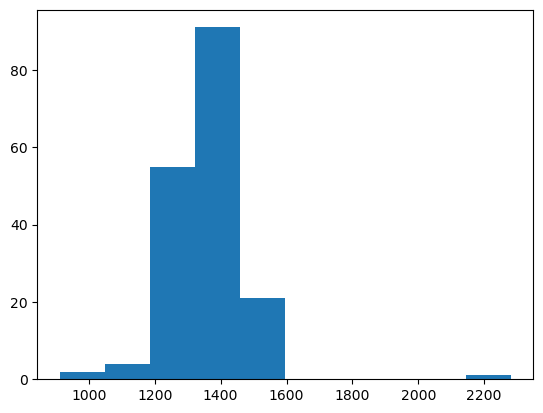

In [624]:
df=df_cal_g[(df_cal_g['Produit']=='Oeufs')]
plt.boxplot(df['cal_g'])

plt.show()
plt.hist(df['cal_g'])
plt.show()

,Code Pays,Pays,Code Produit,Produit,protéinesKg,Kg,protéines
3941,68,France,2511,Blé,6.098869e+08,6.971073e+09,0.087488


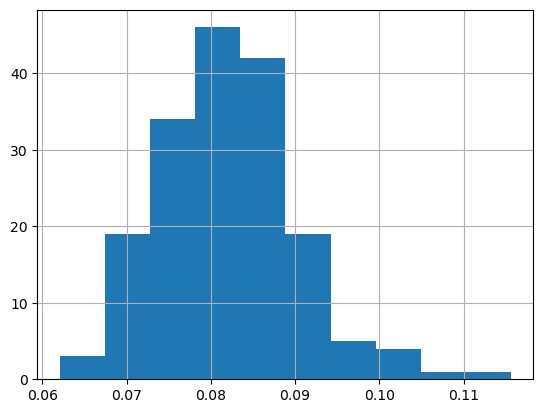

In [625]:
#proteineparproduit

df_Pro_p = m_df_protéinesKg.merge(m_df_Kg, on=['Code Pays', 'Code Produit'])

df_Pro_p=df_Pro_p[(df_Pro_p['protéinesKg']!=0)&(df_Pro_p['Kg']!=0)]

df_Pro_p= df_Pro_p.assign(protéines=(df_Pro_p['protéinesKg']/df_Pro_p['Kg'])) #% de proteines
df_Pro_p=df_Pro_p[['Code Pays', 'Pays_x', 'Code Produit', 'Produit_x', 'protéinesKg', 'Kg', 'protéines']]
df_Pro_p.rename(columns={'Pays_x': 'Pays', 'Produit_x': 'Produit'}, inplace=True)

df_Pro_p[df_Pro_p['Produit']=='Blé'].protéines.hist()
df_Pro_p[(df_Pro_p['Produit']=='Blé') & (df_Pro_p['Pays']=='France')]

#### Question 5 : Aliments les plus caloriques et protéiques
En considérant les aliments végétaux et animaux, citez 5 aliments parmi les 20 aliments les plus caloriques, en utilisant le ratio énergie/poids. Citez 5 aliments parmi les 20 aliments les plus riches en protéines.

In [626]:
df=df_cal_g[["Produit", "cal_g"]]
df=df.groupby(["Produit"]).quantile(0.5)

df = df.reset_index()

df.sort_values(by='cal_g', ascending=False, inplace=True )
fig = px.bar(x=df.head(20).Produit,y=df.head(20).cal_g,height=1000, color_discrete_sequence=color_list_bar)
fig.show()
df.head(20)

,Produit,cal_g
43,Huiles de Foie de Poisso,9866.246499
40,Huile de Son de Riz,9125.000000
41,Huile de Sésame,9125.000000
44,Huiles de Poissons,8892.362637
34,Huile de Coco,8861.778846
36,Huile de Germe de Maïs,8848.484848
33,Huile d'Olive,8844.164299
42,Huile de Tournesol,8841.390114
39,Huile de Soja,8841.111111
32,Huile d'Arachide,8839.843750


In [627]:
m_df_protéinesKg

,Code Pays,Pays,Code Produit,Produit,protéinesKg,protéinesg
0,2,Afghanistan,2511,Blé,411601126.8,4.116011e+11
1,2,Afghanistan,2805,Riz (Eq Blanchi),30108996.0,3.010900e+10
2,2,Afghanistan,2513,Orge,8809669.2,8.809669e+09
3,2,Afghanistan,2514,Maïs,6244828.8,6.244829e+09
4,2,Afghanistan,2517,Millet,892118.4,8.921184e+08
...,...,...,...,...,...,...
11556,181,Zimbabwe,2764,"Poissons Marins, Autres",154942.5,1.549425e+08
11557,181,Zimbabwe,2765,Crustacés,0.0,0.000000e+00
11558,181,Zimbabwe,2766,Cephalopodes,0.0,0.000000e+00
11559,181,Zimbabwe,2767,"Mollusques, Autres",0.0,0.000000e+00


In [628]:

df=m_df_protéinesKg[["Produit", "protéinesKg"]]
df=df.groupby(["Produit"]).quantile(0.5)

df = df.reset_index()

df.sort_values(by='protéinesKg', ascending=False, inplace=True )
fig = px.bar(x=df.head(20).Produit,y=df.head(20).protéinesKg,height=1000, color_discrete_sequence=color_list_bar)
fig.show()
df.head(5)

,Produit,protéinesKg
11,Blé,3.561194e+07
47,Lait - Excl Beurre,2.360373e+07
90,Viande de Bovins,1.098170e+07
92,Viande de Volailles,1.021646e+07
51,Maïs,7.710625e+06


#### Question 6 : Dispo. intérieure mondiale des végétaux
Calculez, pour les produits végétaux uniquement, la disponibilité intérieure mondiale exprimée en kcal.

In [629]:

dfKcal=FAOSTAT_2013_vegetal[FAOSTAT_2013_vegetal['Élément']=='Disponibilité alimentaire (Kcal/personne/jour)']
dfKcal = dfKcal.merge(dPopulation, left_on='Code Pays', right_on='Country Code')
dfKcal.rename(columns={'Value': 'Population'}, inplace=True)

dfKcal=dfKcal.assign(Kcal=dfKcal['Valeur']*dfKcal['Population']*365)

dfKcal=dfKcal[['Produit', 'Kcal']]
dfKcal=dfKcal.groupby("Produit", group_keys=False).sum()
dfKcal.sort_values('Kcal', ascending=False, inplace=True)
dfKcal = dfKcal.reset_index()

dfKcal

,Produit,Kcal
0,Riz (Eq Blanchi),1.381005e+15
1,Blé,1.345279e+15
2,Sucre Eq Brut,5.109690e+14
3,Maïs,3.766566e+14
4,Huile de Soja,2.103646e+14
...,...,...
69,Poivre,7.878098e+11
70,Girofles,4.482236e+10
71,Palmistes,3.416035e+10
72,"Sucre, betterave",2.873499e+10


In [630]:
dfKcal['Kcal'].sum()

6051609427075000.0

In [631]:
df=dfKcal

df.sort_values(by='Kcal', ascending=False, inplace=True )
df_kcal.head(10)
fig = px.bar(x=df.head(10).Produit,y=df.head(10).Kcal, height=1000, color_discrete_sequence=color_list_bar)
fig.show()

#### Question 7 : Potentiel alimentaire des végétaux
Combien d'humains pourraient être nourris si toute la disponibilité intérieure mondiale de produits végétaux était utilisée pour de la nourriture ? Donnez les résultats en termes de calories, puis de protéines, et exprimez ensuite ces 2 résultats en pourcentage de la population mondiale.

In [632]:
m_df_kcal

,Code Pays,Pays,Population,Élément,Code Produit,Produit,Valeur,Kcal
0,2,Afghanistan,30552000,Disponibilité alimentaire (Kcal/personne/jour),2511,Blé,1369.0,1.526638e+13
1,2,Afghanistan,30552000,Disponibilité alimentaire (Kcal/personne/jour),2805,Riz (Eq Blanchi),141.0,1.572359e+12
2,2,Afghanistan,30552000,Disponibilité alimentaire (Kcal/personne/jour),2513,Orge,26.0,2.899385e+11
3,2,Afghanistan,30552000,Disponibilité alimentaire (Kcal/personne/jour),2514,Maïs,21.0,2.341811e+11
4,2,Afghanistan,30552000,Disponibilité alimentaire (Kcal/personne/jour),2517,Millet,3.0,3.345444e+10
...,...,...,...,...,...,...,...,...
14236,181,Zimbabwe,14150000,Disponibilité alimentaire (Kcal/personne/jour),2764,"Poissons Marins, Autres",0.0,0.000000e+00
14237,181,Zimbabwe,14150000,Disponibilité alimentaire (Kcal/personne/jour),2765,Crustacés,0.0,0.000000e+00
14238,181,Zimbabwe,14150000,Disponibilité alimentaire (Kcal/personne/jour),2766,Cephalopodes,0.0,0.000000e+00
14239,181,Zimbabwe,14150000,Disponibilité alimentaire (Kcal/personne/jour),2767,"Mollusques, Autres",0.0,0.000000e+00


In [633]:
m_df_protéinesKg

,Code Pays,Pays,Code Produit,Produit,protéinesKg,protéinesg
0,2,Afghanistan,2511,Blé,411601126.8,4.116011e+11
1,2,Afghanistan,2805,Riz (Eq Blanchi),30108996.0,3.010900e+10
2,2,Afghanistan,2513,Orge,8809669.2,8.809669e+09
3,2,Afghanistan,2514,Maïs,6244828.8,6.244829e+09
4,2,Afghanistan,2517,Millet,892118.4,8.921184e+08
...,...,...,...,...,...,...
11556,181,Zimbabwe,2764,"Poissons Marins, Autres",154942.5,1.549425e+08
11557,181,Zimbabwe,2765,Crustacés,0.0,0.000000e+00
11558,181,Zimbabwe,2766,Cephalopodes,0.0,0.000000e+00
11559,181,Zimbabwe,2767,"Mollusques, Autres",0.0,0.000000e+00


In [634]:
'''
Pour un homme : entre 2000 et 3000 Kcal/jour
Pour une femme : entre 1600 et 2400 Kcal/jour
on retient la moyenne de 2300 kcal/jour
https://www.webmd.com/diet/calories-chart

Les experts recommandent 60 à 100 grammes de protéines par jour on retient la moyenne de 80 grammes
https://www.health.harvard.edu/blog/how-much-protein-do-you-need-every-day-201506188096
'''

Kcal_monde=m_df_kcal.Kcal.sum()
kg_monde=m_df_protéinesKg.protéinesKg.sum()
Totalpopulation=float(Totalpopulation)
besionKcal=float(2300*365)
besion_protéines_kg=(80/1000)*365

print(f"la valeur energitique vegetale monde est :{Kcal_monde.round(2)} kcal")
print(f"les protéines vegetale monde est :{kg_monde.round(2)} kg")

print(f"les besoin humain monde en caloris :{Totalpopulation*besionKcal} kcal")
print(f"les besoin humain monde en protéines :{Totalpopulation*besion_protéines_kg} kg")



population_cal=Kcal_monde/besionKcal
population_kg=kg_monde/besion_protéines_kg

print(f"La population mondiale est {Totalpopulation}")

print(f"Nombre d'humains nourris en caloris :{population_cal} humains")
print(f"Nombre d'humains nourris en protéines :{population_kg} humains")

cal= (population_cal/Totalpopulation)*100
kg= (population_kg/Totalpopulation)*100

print(f"la population Kcal :{cal.round(2)}%")
print(f"la population kg :{kg.round(2)}%")


la valeur energitique vegetale monde est :7363883420185000.0 kcal
les protéines vegetale monde est :207259180075.55 kg
les besoin humain monde en caloris :5874255177000000.0 kcal
les besoin humain monde en protéines :204321919200.0 kg
La population mondiale est 6997326000.0
Nombre d'humains nourris en caloris :8771749160.434782 humains
Nombre d'humains nourris en protéines :7097917125.875 humains
la population Kcal :125.36%
la population kg :101.44%


#### Question 8 : Potentiel alimentaire des végétaux (destinés aux animaux pertes)
Combien d'humains pourraient être nourris si toute la disponibilité alimentaire en produits végétaux la nourriture végétale destinée aux animaux et les pertes de produits végétaux étaient utilisés pour de la nourriture ? Donnez les résultats en termes de calories, puis de protéines, et exprimez ensuite ces 2 résultats en pourcentage de la population mondiale.

In [635]:


def Calcule_Total(df_filtre):
    group_df=df_filtre[['Pays', 'Produit', 'Valeur']].groupby(['Pays', 'Produit'],as_index=False).sum()

    group_df=group_df.merge(df_Pro_p, on=[ 'Pays', 'Produit'])
    group_df=group_df[['Pays', 'Produit', 'Valeur', 'protéines']]

    group_df=group_df.merge(df_cal_g, on=[ 'Pays', 'Produit'])
    group_df=group_df[['Pays', 'Produit', 'Valeur', 'protéines', 'cal_g']]

    group_df=group_df.assign(totalproteinesKg=(group_df['Valeur']*1000*1000)*group_df['protéines'])

    group_df=group_df.assign(totalcalKcal=(group_df['Valeur']*1000*1000)*group_df['cal_g'])

    return group_df['totalproteinesKg'].sum(), group_df['totalcalKcal'].sum()


def Totalprint (totalproteinesKg_mode, totalcalKcal_mode):
    
    print(f"La production de calories mondiale est : {totalcalKcal_mode}Kcal")

    print(f"La production de proteines mondiale est : {totalproteinesKg_mode}Kg")
    
    print(f"le nombre d'humains avec les calories : {(totalcalKcal_mode/besionKcal)} humains")

    print(f"le nombre d'humains avec les proteines : {(totalproteinesKg_mode/besion_protéines_kg)} humains")
    

    print(f"Les humains qui peuvent vivre avec les calories mondiale est : {((totalcalKcal_mode/besionKcal)/Totalpopulation)*100} %")
    print(f"Les humains qui peuvent vivre avec les proteines mondiale est : {((totalproteinesKg_mode/besion_protéines_kg)/Totalpopulation)*100} %")

df=FAOSTAT_2013_vegetal
df=df.loc[(df['Élément']=="Aliments pour animaux") | (df['Élément']=="Pertes")] 

print("-------------vegetal------------------")
totalproteinesKg_mode, totalcalKcal_mode = Calcule_Total(df)
Totalprint(totalproteinesKg_mode, totalcalKcal_mode)

-------------vegetal------------------
La production de calories mondiale est : 3119411511488554.0Kcal
La production de proteines mondiale est : 77487615668.19154Kg
le nombre d'humains avec les calories : 3715796916.6033998 humains
le nombre d'humains avec les proteines : 2653685468.088752 humains
Les humains qui peuvent vivre avec les calories mondiale est : 53.10309847795286 %
Les humains qui peuvent vivre avec les proteines mondiale est : 37.92427947602773 %


#### Question 9 : Potentiel alimentaire de la dispo. Mondiale
Combien d'humains pourraient être nourris avec la disponibilité alimentaire mondiale ? Donnez les résultats en termes de calories, puis de protéines, et exprimez ensuite ces 2 résultats en pourcentage de la population mondiale.

In [636]:
m_df_kcal

,Code Pays,Pays,Population,Élément,Code Produit,Produit,Valeur,Kcal
0,2,Afghanistan,30552000,Disponibilité alimentaire (Kcal/personne/jour),2511,Blé,1369.0,1.526638e+13
1,2,Afghanistan,30552000,Disponibilité alimentaire (Kcal/personne/jour),2805,Riz (Eq Blanchi),141.0,1.572359e+12
2,2,Afghanistan,30552000,Disponibilité alimentaire (Kcal/personne/jour),2513,Orge,26.0,2.899385e+11
3,2,Afghanistan,30552000,Disponibilité alimentaire (Kcal/personne/jour),2514,Maïs,21.0,2.341811e+11
4,2,Afghanistan,30552000,Disponibilité alimentaire (Kcal/personne/jour),2517,Millet,3.0,3.345444e+10
...,...,...,...,...,...,...,...,...
14236,181,Zimbabwe,14150000,Disponibilité alimentaire (Kcal/personne/jour),2764,"Poissons Marins, Autres",0.0,0.000000e+00
14237,181,Zimbabwe,14150000,Disponibilité alimentaire (Kcal/personne/jour),2765,Crustacés,0.0,0.000000e+00
14238,181,Zimbabwe,14150000,Disponibilité alimentaire (Kcal/personne/jour),2766,Cephalopodes,0.0,0.000000e+00
14239,181,Zimbabwe,14150000,Disponibilité alimentaire (Kcal/personne/jour),2767,"Mollusques, Autres",0.0,0.000000e+00


In [637]:
m_df_protéinesKg

,Code Pays,Pays,Code Produit,Produit,protéinesKg,protéinesg
0,2,Afghanistan,2511,Blé,411601126.8,4.116011e+11
1,2,Afghanistan,2805,Riz (Eq Blanchi),30108996.0,3.010900e+10
2,2,Afghanistan,2513,Orge,8809669.2,8.809669e+09
3,2,Afghanistan,2514,Maïs,6244828.8,6.244829e+09
4,2,Afghanistan,2517,Millet,892118.4,8.921184e+08
...,...,...,...,...,...,...
11556,181,Zimbabwe,2764,"Poissons Marins, Autres",154942.5,1.549425e+08
11557,181,Zimbabwe,2765,Crustacés,0.0,0.000000e+00
11558,181,Zimbabwe,2766,Cephalopodes,0.0,0.000000e+00
11559,181,Zimbabwe,2767,"Mollusques, Autres",0.0,0.000000e+00


In [638]:
sum_kcal=m_df_kcal.Kcal.sum()
print(sum_kcal)
sum_kg=m_df_protéinesKg.protéinesKg.sum()
print(sum_kg)

person_cal=sum_kcal/besionKcal
person_prot=sum_kg/besion_protéines_kg
print(f"{person_cal}")
print(f"{person_prot}")



7363883420185000.0
207259180075.55
8771749160.434782
7097917125.875


In [639]:
print(f"Les humains qui peuvent vivre avec les calories mondiale est : {((person_cal)/Totalpopulation)*100} %")
print(f"Les humains qui peuvent vivre avec les proteines mondiale est : {((person_prot)/Totalpopulation)*100} %")

Les humains qui peuvent vivre avec les calories mondiale est : 125.35858927302776 %
Les humains qui peuvent vivre avec les proteines mondiale est : 101.4375652338479 %


In [640]:
# df = pd.concat([FAOSTAT_2013_vegetal, FAOSTAT_2013_animal])
# df = df[['Code Pays', 'Pays', 'Élément', 'Code Produit', 'Produit', 'Valeur']]
# df = df[df['Élément']=='Nourriture']
# print("-------------Disponibilité alimentaire------------------")
# totalproteinesKg_mode, totalcalKcal_mode = Calcule_Total(df)
# Totalprint(totalproteinesKg_mode, totalcalKcal_mode)

#### Question 10 : Proportion de la sous-nutrition mondiale
A partir des données téléchargées qui concernent la sous-nutrition, répondez à cette question : Quelle proportion de la population mondiale est considérée comme étant en sous-nutrition ?

In [641]:
# Cleaning sous_alimentation
FAOSTAT_2013_sous_alimentation = FAOSTAT_2013_sous_alimentation.query("Symbole != 'NV'")
df=FAOSTAT_2013_sous_alimentation

dPopulation=FAOSTAT_2013_population
dPopulation=dPopulation[['Country Code', 'Country', 'Value']]
dPopulation.loc[:,'Value']=FAOSTAT_2013_population['Value']*1000




df = FAOSTAT_2013_sous_alimentation.merge(dPopulation, left_on='Code zone', right_on='Country Code')

df['Valeur'].fillna(0, inplace=True)

df.rename(columns={'Value': 'Population'}, inplace=True)
df=df[['Code zone', 'Zone', 'Valeur', 'Symbole', 'Description du Symbole', 'Population']]

      
df=df.assign(proportion=df['Valeur']*1e6/Totalpopulation)
proportion_mondiale=(df['Valeur'].sum()*1e6/Totalpopulation)*100
print(Totalpopulation)
print(f'la proportion de la population mondiale considérée comme en sous-nutrition est {proportion_mondiale.round(2)}%')
Sous_alimentation=df
Sous_alimentation


6997326000.0
la proportion de la population mondiale considérée comme en sous-nutrition est 10.57%


,Code zone,Zone,Valeur,Symbole,Description du Symbole,Population,proportion
0,2,Afghanistan,8.1,F,Estimation FAO,30552000,0.001158
1,202,Afrique du Sud,2.6,F,Estimation FAO,52776000,0.000372
2,3,Albanie,0.2,F,Estimation FAO,3173000,0.000029
3,4,Algérie,1.8,F,Estimation FAO,39208000,0.000257
4,79,Allemagne,0.0,<2,Moins de 2 millions de personnes sont sous-ali...,82727000,0.000000
...,...,...,...,...,...,...,...
161,236,Venezuela (République bolivarienne du),1.8,F,Estimation FAO,30405000,0.000257
162,237,Viet Nam,11.1,F,Estimation FAO,91680000,0.001586
163,249,Yémen,7.1,F,Estimation FAO,24407000,0.001015
164,251,Zambie,7.0,F,Estimation FAO,14539000,0.001000


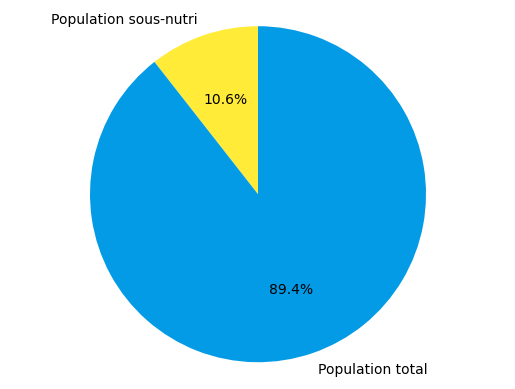

In [642]:
# Vos données
proportion_mondiale=(df['Valeur'].sum()*1e6/df['Population'].sum())*100



population_sous_nutri = df['Valeur'].sum() * 1e6
population_total =Totalpopulation

# Création des labels et des valeurs
labels = ['Population sous-nutri', 'Population total']
sizes = [population_sous_nutri, population_total-population_sous_nutri]

# Création du graphique
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=color_list_pie)

# Assure que le graphique est dessiné en cercle.
ax1.axis('equal')

plt.show()

In [643]:
# Cleaning sous_alimentation
FAOSTAT_2013_sous_alimentation = FAOSTAT_2013_sous_alimentation.query("Symbole != 'NV'")
df=FAOSTAT_2013_sous_alimentation.copy()
mask = df['Symbole'].str.contains('<')
df.loc[mask, 'Valeur'] = df.loc[mask, 'Symbole'].str.replace('<', '').astype(float)

Totalpopulation=FAOSTAT_2013_population['Value'].sum()*1000
print(f"Le nombre d'humains sur la planète est: {Totalpopulation}")

dPopulation=FAOSTAT_2013_population
dPopulation=dPopulation[['Country Code', 'Country', 'Value']]
dPopulation.loc[:,'Value']=FAOSTAT_2013_population['Value']*1000


df = FAOSTAT_2013_sous_alimentation.merge(dPopulation, left_on='Code zone', right_on='Country Code')
#df=df.dropna()
df.rename(columns={'Value': 'Population'}, inplace=True)
df=df[['Code zone', 'Zone', 'Valeur', 'Symbole', 'Description du Symbole', 'Population']]

      
df=df.assign(proportion=df['Valeur']*1e6/df['Population']*100)
proportion_mondiale=(df['Valeur'].sum()*1e6/df['Population'].sum())*100

print(f'la proportion de la population mondiale considérée comme en sous-nutrition est {proportion_mondiale.round(2)}%')
Sous_alimentation=df
Sous_alimentation

Le nombre d'humains sur la planète est: 6997326000
la proportion de la population mondiale considérée comme en sous-nutrition est 10.59%


,Code zone,Zone,Valeur,Symbole,Description du Symbole,Population,proportion
0,2,Afghanistan,8.1,F,Estimation FAO,30552000,26.512176
1,202,Afrique du Sud,2.6,F,Estimation FAO,52776000,4.926482
2,3,Albanie,0.2,F,Estimation FAO,3173000,6.303183
3,4,Algérie,1.8,F,Estimation FAO,39208000,4.590900
4,79,Allemagne,NaN,<2,Moins de 2 millions de personnes sont sous-ali...,82727000,NaN
...,...,...,...,...,...,...,...
161,236,Venezuela (République bolivarienne du),1.8,F,Estimation FAO,30405000,5.920079
162,237,Viet Nam,11.1,F,Estimation FAO,91680000,12.107330
163,249,Yémen,7.1,F,Estimation FAO,24407000,29.090015
164,251,Zambie,7.0,F,Estimation FAO,14539000,48.146365


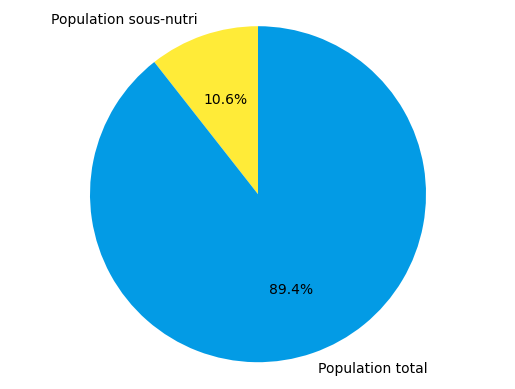

In [644]:
# Vos données
proportion_mondiale=(df['Valeur'].sum()*1e6/df['Population'].sum())*100


population_sous_nutri = df['Valeur'].sum() * 1e6
population_total =df['Population'].sum()

# Création des labels et des valeurs
labels = ['Population sous-nutri', 'Population total']
sizes = [population_sous_nutri, population_total-population_sous_nutri]

# Création du graphique
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=color_list_pie)

# Assure que le graphique est dessiné en cercle.
ax1.axis('equal')

plt.show()

#### Question 11 : Céréales
Établissez la liste des produits (ainsi que leur code) considéré comme des céréales selon la FAO. En ne prenant en compte que les céréales destinées à l'alimentation (humaine et animale), quelle proportion (en termes de poids) est destinée à l'alimentation animale ?

In [645]:
cereal=FAOSTAT_2013_cereal
 
cereal=cereal.loc[(cereal['Élément']=='Aliments pour animaux') | (cereal['Élément']=='Nourriture')]
cereal=cereal[['Code Produit', 'Produit', 'Élément','Valeur']]
groupe_cereal=cereal.groupby(['Code Produit','Produit', 'Élément'],as_index=False).sum()

g_cereal = groupe_cereal.pivot(index=['Code Produit', 'Produit'], columns='Élément', values='Valeur').reset_index()
g_cereal=g_cereal.assign(proportion_animale=g_cereal['Aliments pour animaux']/(g_cereal['Aliments pour animaux']+g_cereal['Nourriture'])*100)
g_cereal




Élément,Code Produit,Produit,Aliments pour animaux,Nourriture,proportion_animale
0,2511,Blé,129668.0,457824.0,22.071449
1,2513,Orge,92658.0,6794.0,93.168564
2,2514,Maïs,546116.0,125184.0,81.352004
3,2515,Seigle,8099.0,5502.0,59.547092
4,2516,Avoine,16251.0,3903.0,80.634117
5,2517,Millet,3306.0,23040.0,12.548394
6,2518,Sorgho,24808.0,24153.0,50.668900
7,2520,"Céréales, Autres",19035.0,5324.0,78.143602
8,2805,Riz (Eq Blanchi),33594.0,377286.0,8.176110


In [646]:
proportion_animale=g_cereal['Aliments pour animaux'].sum()/(g_cereal['Aliments pour animaux'].sum()+g_cereal['Nourriture'].sum())*100
print(f"la proportion est : {proportion_animale.round(2)}%")

la proportion est : 45.91%


In [647]:
g_cereal.sort_values(by='proportion_animale', ascending=False, inplace=True )
fig = px.bar(x=g_cereal.Produit, y=g_cereal.proportion_animale, height=1000, color_discrete_sequence=color_list_bar)
fig.show()

#### Question 12 : Sous-nutrition
Sélectionnez parmi les données des bilans alimentaires les informations relatives aux pays dans lesquels la FAO recense des personnes en sous-nutrition.
Repérez les 15 produits les plus exportés par ce groupe de pays.
Parmi les données des bilans alimentaires au niveau mondial, sélectionnez les 200 plus grandes importations de ces produits (1 importation = une quantité d'un produit donné importée par un pays donné).
Groupez ces importations par produit, afin d'avoir une table contenant 1 ligne pour chacun des 15 produits. Ensuite, calculez pour chaque produit les 2 quantités suivantes :

    • le ratio entre la quantité destinés aux "Autres utilisations" (Other uses) et la disponibilité intérieure.
    • le ratio entre la quantité destinée à la nourriture animale et la quantité destinée à la nourriture (animale + humaine)
    
Donnez les 3 produits qui ont la plus grande valeur pour chacun des 2 ratios (vous aurez donc 6 produits à citer)

In [686]:
Sous_alimentation=Sous_alimentation.sort_values('proportion', ascending=False)
Sous_alimentation=Sous_alimentation[Sous_alimentation['Valeur']>0]
Sous_alimentation

,Code zone,Zone,Valeur,Symbole,Description du Symbole,Population,proportion
66,93,Haïti,5.2,F,Estimation FAO,10317000,50.402249
164,251,Zambie,7.0,F,Estimation FAO,14539000,48.146365
165,181,Zimbabwe,6.7,F,Estimation FAO,14150000,47.349823
127,37,République centrafricaine,2.1,F,Estimation FAO,4616000,45.493934
131,116,République populaire démocratique de Corée,10.4,F,Estimation FAO,24895000,41.775457
...,...,...,...,...,...,...,...
142,199,Slovaquie,0.2,F,Estimation FAO,5450000,3.669725
7,9,Argentine,1.5,F,Estimation FAO,41446000,3.619167
29,40,Chili,0.6,F,Estimation FAO,17620000,3.405221
94,131,Malaisie,1.0,F,Estimation FAO,29717000,3.365077


In [687]:
df = pd.concat([FAOSTAT_2013_vegetal, FAOSTAT_2013_animal])
df = df[['Code Pays', 'Pays', 'Élément', 'Code Produit', 'Produit', 'Valeur']]
#df = df[df['Élément']=='Nourriture']
df_Sous_alimentation = Sous_alimentation.merge(df, left_on='Code zone', right_on='Code Pays')

df_Sous_alimentation=df_Sous_alimentation[['Code Pays', 'Pays', 'Élément', 'Produit', 'Valeur_y']]
df_expot=df_Sous_alimentation[df_Sous_alimentation['Élément']=='Exportations - Quantité']

df_expot=df_expot.sort_values('Valeur_y', ascending=False)
df_expot=df_expot[['Produit', 'Valeur_y']]
df_expot_group=df_expot.groupby(['Produit']).sum()
df_expot_group=df_expot_group.sort_values('Valeur_y', ascending=False).reset_index()
df_expot_group=df_expot_group.head(15)
df_expot_group

,Produit,Valeur_y
0,Huile de Palme,46285.0
1,Maïs,37888.0
2,Manioc,35843.0
3,Riz (Eq Blanchi),32787.0
4,Sucre Eq Brut,25237.0
5,Blé,24841.0
6,"Légumes, Autres",19948.0
7,Bananes,17805.0
8,"Fruits, Autres",14590.0
9,Lait - Excl Beurre,14486.0


In [688]:

df_import = df[df['Élément']=='Importations - Quantité']
df_import=df_import[['Pays', 'Produit', 'Valeur']]

merge_df_import = df_import.merge(df_expot_group, left_on='Produit', right_on='Produit')
merge_df_import


,Pays,Produit,Valeur,Valeur_y
0,Afghanistan,Blé,1173.0,24841.0
1,Afrique du Sud,Blé,1490.0,24841.0
2,Albanie,Blé,360.0,24841.0
3,Algérie,Blé,6343.0,24841.0
4,Allemagne,Blé,5421.0,24841.0
...,...,...,...,...
2532,Venezuela (République bolivarienne du),Poissons Pelagiques,71.0,13680.0
2533,Viet Nam,Poissons Pelagiques,102.0,13680.0
2534,Yémen,Poissons Pelagiques,23.0,13680.0
2535,Zambie,Poissons Pelagiques,8.0,13680.0


In [689]:
dfpays=merge_df_import[['Pays', 'Valeur']]

df_import_pays = dfpays.groupby(['Pays'],as_index=False).sum()

df_import_pays=df_import_pays.sort_values('Valeur', ascending=False)
df_import_pays=df_import_pays.head(20)
df_import_pays

,Pays,Valeur
36,"Chine, continentale",133243.0
171,États-Unis d'Amérique,44692.0
4,Allemagne,38157.0
77,Japon,37263.0
118,Pays-Bas,31137.0
125,Royaume-Uni,27329.0
75,Italie,27089.0
128,République de Corée,23575.0
48,Espagne,23213.0
99,Mexique,21911.0


In [690]:

merge_df_import=merge_df_import[['Produit', 'Valeur']]

df_import_produit = merge_df_import.groupby(['Produit'],as_index=False).sum()

df_import_produit=df_import_produit.sort_values('Valeur', ascending=False)

df_import_produit

,Produit,Valeur
1,Blé,185377.0
7,Maïs,122691.0
4,Lait - Excl Beurre,116806.0
12,Soja,102082.0
13,Sucre Eq Brut,61615.0
3,Huile de Palme,48858.0
5,"Légumes, Autres",43333.0
6,Manioc,38370.0
11,Riz (Eq Blanchi),37618.0
8,"Oranges, Mandarines",35011.0


In [695]:

merge_df_produit=df.merge(df_import_produit, left_on='Produit', right_on='Produit')
merge_df_produit.drop('Valeur_y',axis=1, inplace=True)

merge_df_produit.rename(columns={'Valeur_x':'Valeur'}, inplace=True)
merge_df_produit


,Code Pays,Pays,Élément,Code Produit,Produit,Valeur
0,2,Afghanistan,Production,2511,Blé,5169.00
1,2,Afghanistan,Importations - Quantité,2511,Blé,1173.00
2,2,Afghanistan,Variation de stock,2511,Blé,-350.00
3,2,Afghanistan,Disponibilité intérieure,2511,Blé,5992.00
4,2,Afghanistan,Semences,2511,Blé,322.00
...,...,...,...,...,...,...
27664,181,Zimbabwe,Disponibilité de matière grasse en quantité (g...,2763,Poissons Pelagiques,0.06
27665,351,Chine,Disponibilité alimentaire en quantité (kg/pers...,2763,Poissons Pelagiques,0.39
27666,351,Chine,Disponibilité alimentaire (Kcal/personne/jour),2763,Poissons Pelagiques,1.00
27667,351,Chine,Disponibilité de protéines en quantité (g/pers...,2763,Poissons Pelagiques,0.13


In [708]:
merge=merge_df_produit.merge(df_import_pays, left_on='Pays', right_on='Pays')
merge.drop('Valeur_y',axis=1, inplace=True)
merge.rename(columns={'Valeur_x':'Valeur'}, inplace=True)
merge

,Code Pays,Pays,Élément,Code Produit,Produit,Valeur
0,4,Algérie,Production,2511,Blé,3299.00
1,4,Algérie,Importations - Quantité,2511,Blé,6343.00
2,4,Algérie,Variation de stock,2511,Blé,-180.00
3,4,Algérie,Exportations - Quantité,2511,Blé,2.00
4,4,Algérie,Disponibilité intérieure,2511,Blé,9461.00
...,...,...,...,...,...,...
3470,229,Royaume-Uni,Nourriture,2763,Poissons Pelagiques,218.00
3471,229,Royaume-Uni,Disponibilité alimentaire en quantité (kg/pers...,2763,Poissons Pelagiques,3.43
3472,229,Royaume-Uni,Disponibilité alimentaire (Kcal/personne/jour),2763,Poissons Pelagiques,13.00
3473,229,Royaume-Uni,Disponibilité de protéines en quantité (g/pers...,2763,Poissons Pelagiques,1.49


In [710]:
# merge=merge.pivot(index=['Code Produit', 'Produit'], columns='Élément', values='Valeur').reset_index()
# merge

In [720]:

Autres_Utilisations=merge[merge['Élément']=='Autres Utilisations'].Valeur.sum()
#print(Autres_Utilisations)
disponibilité_intérieure=merge[merge['Élément']=='Disponibilité intérieure'].Valeur.sum()
#print(disponibilité_intérieure)
radio1=(Autres_Utilisations/disponibilité_intérieure*100).round(2)
print(f'le ratio entre la quantité destinés aux "Autres utilisations" (Other uses) et la disponibilité intérieure est {radio1} %')

Aliments_pour_animaux=merge[merge['Élément']=='Aliments pour animaux'].Valeur.sum()

Nourriture=merge[merge['Élément']=='Nourriture'].Valeur.sum()

radio2=(Aliments_pour_animaux/(Aliments_pour_animaux+Nourriture)*100).round(2)
print(f'le ratio entre la quantité destinée à la nourriture animale et la quantité destinée à la nourriture (animale + humaine) est {radio2} %')


le ratio entre la quantité destinés aux "Autres utilisations" (Other uses) et la disponibilité intérieure est 8.59 %
le ratio entre la quantité destinée à la nourriture animale et la quantité destinée à la nourriture (animale + humaine) est 26.61 %


#### Question 13 : USA
Combien de tonnes de céréales pourraient être libérées si les USA diminuaient leur production de produits animaux de 10% ?

In [653]:
usa=FAOSTAT_2013_cereal
usa=usa.loc[(usa['Pays']=="États-Unis d'Amérique")&(usa['Élément']=="Aliments pour animaux")]
usa=usa[['Code Produit', 'Produit', 'Unité', 'Valeur']]
usa=usa.assign(Valeur_10_tonne=(usa['Valeur']*0.1)*1000)
print(f"10% de la production de produits animaux est: {usa['Valeur_10_tonne'].sum().round(2) } Tonnes")
usa

10% de la production de produits animaux est: 14009600.0 Tonnes


,Code Produit,Produit,Unité,Valeur,Valeur_10_tonne
4902,2511,Blé,Milliers de tonnes,6196.0,619600.0
4930,2513,Orge,Milliers de tonnes,1440.0,144000.0
4944,2514,Maïs,Milliers de tonnes,128024.0,12802400.0
4958,2515,Seigle,Milliers de tonnes,184.0,18400.0
4971,2516,Avoine,Milliers de tonnes,1430.0,143000.0
4982,2517,Millet,Milliers de tonnes,394.0,39400.0
4989,2518,Sorgho,Milliers de tonnes,2351.0,235100.0
5002,2520,"Céréales, Autres",Milliers de tonnes,77.0,7700.0


In [654]:
usa.sort_values(by='Valeur_10_tonne', ascending=False, inplace=True )
fig = px.bar(x=usa.Produit, y=usa.Valeur_10_tonne, height=1000, color_discrete_sequence=color_list_bar)
fig.show()

#### Question 14 : Thaïlande
En Thaïlande, quelle proportion de manioc est exportée ? Quelle est la proportion de personnes en sous-nutrition?

In [655]:
Tai=FAOSTAT_2013_vegetal
Tai=Tai.loc[(Tai['Pays']=="Thaïlande")&(Tai['Produit']=="Manioc")]
export=Tai[Tai['Élément']=="Exportations - Quantité"].Valeur.sum()*1000
production=Tai[Tai['Élément']=="Production"].Valeur.sum()*1000
print(f"la Proportion de manioc exportée est {(export/(production)*100).round(2)} %")

sous_nutrition=Sous_alimentation.loc[Sous_alimentation['Zone']=="Thaïlande", 'proportion'].values[0]
population_tai=Sous_alimentation.loc[Sous_alimentation['Zone']=="Thaïlande", 'Population'].values[0]
print(f"la proportion de personnes en sous-nutrition est: {sous_nutrition.round(2)} %")
Sous_alimentation[Sous_alimentation['Zone']=="Thaïlande"]

la Proportion de manioc exportée est 83.41 %
la proportion de personnes en sous-nutrition est: 9.1 %


,Code zone,Zone,Valeur,Symbole,Description du Symbole,Population,proportion
151,216,Thaïlande,6.1,F,Estimation FAO,67011000,9.102983


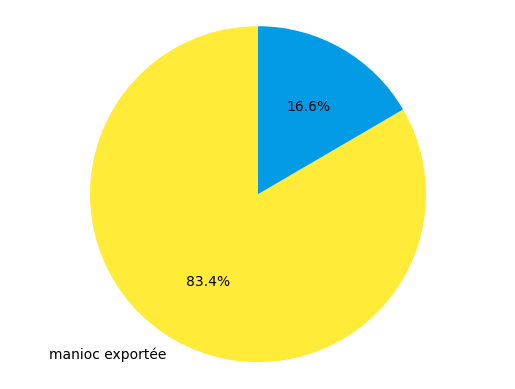

In [656]:
# Vos données


# Création des labels et des valeurs
labels = ['manioc exportée', '']
sizes = [export, production-export]

# Création du graphique
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=color_list_pie)

# Assure que le graphique est dessiné en cercle.
ax1.axis('equal')

plt.show()

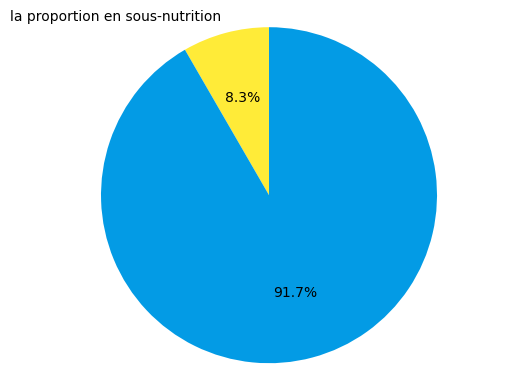

In [657]:
# Vos données

# Création des labels et des valeurs
labels = ['la proportion en sous-nutrition', '']
sizes = [sous_nutrition, 100]

# Création du graphique
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=color_list_pie)

# Assure que le graphique est dessiné en cercle.
ax1.axis('equal')

plt.show()

### 2 - Etude guidée n°2

Il s’agit ici d’intégrer toutes les données dans une base de données relationnelle puis de répondre à toutes les questions ci-dessous.
La base de données contiendra 4 tables : population, dispo_alim, equilibre_prod, sous_nutrition.

#### Question 15 : Table population
Définir une clé primaire pertinente pour la table population. Intégrer la table dans la base de données relationnelle.

#### Question 16 : Table dispo_alim
La table appelée dispo_alim contient pour chaque pays, pour chaque produit, sur l'année 2013, les informations suivantes:
- la nature du produit (deux valeurs possibles“animal” ou “végétal”)
- disponibilité alimentaire en tonnes
- disponibilité alimentaire en Kcal/personne/jour
- disponibilité alimentaire de protéines en g/personne/jour
- disponibilité alimentaire de matières grasses en g/personne/jour
La table contient ces colonnes : pays, code_pays, année, produit, code_produit, origin, dispo_alim_tonnes, dispo_alim_kcal_p_j, dispo_prot, dispo_mat_gr .
Définir une clé primaire pertinente pour la table dispo_alim. Intégrer la table dans la base de données relationnelle.

#### Question 17 : Table equilibre_prod
La table appelée equilibre_prod contient pour chaque pays, pour chaque produit, et pour l'année disponible 2013, les quantités suivantes :
- disponibilité intérieure
- aliments pour animaux
- semences
- pertes
- transformés
- nourriture
- autres utilisations
Elle contient ces colonnes : pays, code_pays, année, produit, code_produit, dispo_int, alim_ani, semences, pertes, transfo, nourriture, autres_utilisations.
Définir une clé primaire pertinente pour la table equilibre_prod. Intégrer la table dans la base de données relationnelle.

#### Question 18 : Table sous_nutrition
La table appelée sous_nutrition, contient le nombre de personnes en sous-alimentation pour chaque pays et pour chaque année. Elle contient 4 colonnes : pays, code_pays, année, nb_personnes.
Définir une clé primaire pertinente pour la table sous_nutrition. Intégrer la table dans la base de données relationnelle.

#### Question 19 : Requêtes SQL
Formuler les requêtes SQL pour répondre aux questions suivantes :
    • Quels sont les 10 pays ayant le plus haut ratio disponibilité alimentaire/habitant en termes de protéines (en kg) par habitant, puis en termes de kcal par habitant ?
    • Quels sont les 10 pays ayant le plus faible ratio disponibilité alimentaire/habitant en termes de protéines (en kg) par habitant ?
    • Quelle est la quantité totale (en kg) de produits perdus par pays?
    • Quels sont les 10 pays pour lesquels la proportion de personnes sous-alimentées est la plus forte ?
    • Quels sont les 10 produits pour lesquels le ratio Autres utilisations/Disponibilité intérieure est le plus élevé ?

#### Question 20 : Autres utilisations des produits
Pour quelques-uns des produits identifiés dans cette dernière requête SQL, supposez quelles sont ces "autres utilisations" possibles (recherchez sur internet !).

### 3 - Analyses complémentaire

Fort de votre expérience de Data Analyst, il s’agit maintenant de réaliser vos propres analyses et exploration.